# **Introduction**
Stack overflow is a professional community for developers. They conduct developer surveys every year since 2011. The collected data is available open-source on the web. The Dataset would help us to answer real-world questions with the help of proper analysis. The most popular language that developers use can be found through the analysis. We also can find the developer role which pays the highest salary. The aim of our project is to analyze the 2022 developer surveys datasets from where we collect valuable insights from them.

# **Methodology**

This analysis is going to follow the CRISP-DM methodology, cross-industry process for data mining. CRISP-DM is a robust and well known methodology that provides a structured approach to planning a data mining project. It includes the following processes:



1.  Business understanding
2.  Data understanding
3.  Preparing data
4.  Data modeling
5.  Evaluating results
6.  Deployment


In this project, the survey results will be used to answer the following questions for aspiring data scientists:

1.  What are the most working programming language in 2022?
2.  what are the top jobs in 2022? 
3.  What is the proportion of developers who work remotely?
4.  What are the most learning course certification in 2022?

A summary of the finding is available at this blogpost: https://medium.com/@emna.krichen_72178/2022-stackoverflow-survey-analysis-6203b4edb1e3

In [115]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter
# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# **Gather Data**


In [116]:
# Reading Stackoverflow survey data 2022
#Data source: 2022 in https://insights.stackoverflow.com/survey

df_stack = pd.read_csv('/content/survey_results_public.csv')

In [117]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [118]:
# Sample 2022 Data
df_stack.head(2)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN


The data is very challenging, many columns contain many values which make it hard to analyze

# **Assess Data**

In [119]:
df_stack.shape

(73268, 79)

In [164]:
df_stack.Country.nunique()

180

There are 73268 developers who respond to this survey, comng from 180 country.

In this project, we will focus on only few features Which we hypothesize that they are strongly related to our business questions.

In [120]:
df = df_stack[['MainBranch', 'RemoteWork','LearnCode', 'LearnCodeOnline','LearnCodeCoursesCert','YearsCode','DevType','Country','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','Age']]

In [121]:
df.describe()

,MainBranch,RemoteWork,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,DevType,Country,LanguageHaveWorkedWith,MiscTechHaveWorkedWith,Age
count,73268,58958,71580,50685,29389,71331,61302,71771,70975,44992,70946
unique,6,3,737,7192,206,52,9984,180,25068,4205,8
top,I am a developer by profession,Fully remote,"School (i.e., University, College, etc)",Technical documentation;Blogs;Written Tutorial...,Udemy,10,"Developer, full-stack",United States of America,HTML/CSS;JavaScript;TypeScript,.NET,25-34 years old
freq,53507,25341,3669,715,5643,5217,7142,13543,1250,8181,28112


In [122]:
#check columns with missing values
df.isnull().sum()

MainBranch                    0
RemoteWork                14310
LearnCode                  1688
LearnCodeOnline           22583
LearnCodeCoursesCert      43879
YearsCode                  1937
DevType                   11966
Country                    1497
LanguageHaveWorkedWith     2293
MiscTechHaveWorkedWith    28276
Age                        2322
dtype: int64

In [124]:
#cleaning missing values
df.dropna(inplace=True)

<ipython-input-124-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


# **1.What are the most working programming language?**

In [125]:
df.LanguageHaveWorkedWith

16                                    C#;Java;PHP;Python;R
25                    Dart;Go;Java;Kotlin;Swift;TypeScript
34               HTML/CSS;JavaScript;Python;SQL;TypeScript
39       Bash/Shell;Groovy;HTML/CSS;Java;JavaScript;Per...
41                          Bash/Shell;HTML/CSS;Python;SQL
                               ...                        
73261    Bash/Shell;HTML/CSS;Java;JavaScript;Python;SQL...
73263    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73264            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73265                   HTML/CSS;JavaScript;PHP;Python;SQL
73267          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 12751, dtype: object

We notice that developers choose many programming language at the same time, Also we notice that there are missing values, we hypothesize that maybe the developer is a new starter and he still doesn't know which language he prefers.

In [126]:
# develop a function that will be used for plotting bar graphs per column
def plot_column_count(column, plot_title, df=df):
    """ Function for plotting a bar graph for the given column
    
    INPUT - column -  
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per column of interest
            
    """
    count_values = column.value_counts()#Provide a pandas series of the counts for each LanguageWorkedWith

    # display the top 10
    (count_values[:10]/df.shape[0]).plot(kind="bar");
    plt.title(plot_title);

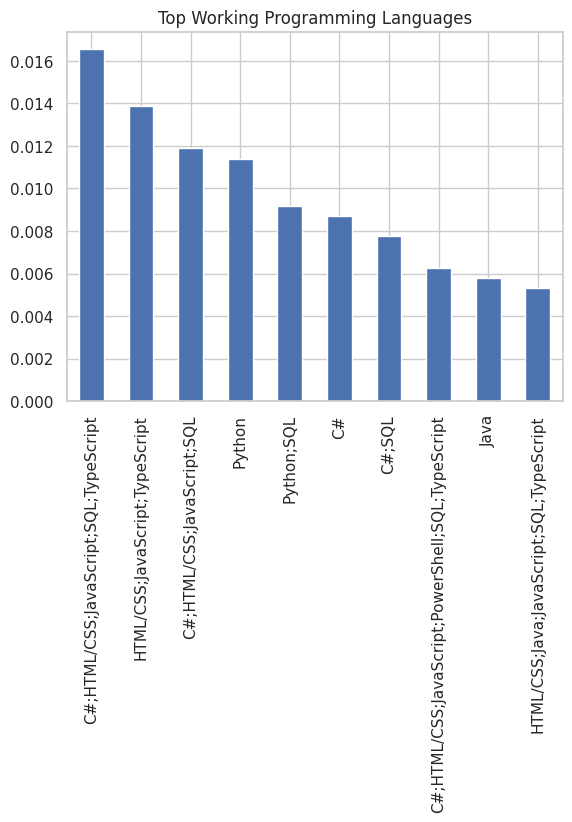

In [127]:
plot_column_count(df.LanguageHaveWorkedWith, "Top Working Programming Languages")

The graph depicts that the most pefered language is Javascript followed by Python then Java. But as the format of this column is messy, so we  we need to clean it by splitting this column so that we can analyse languages one by one.

In [128]:
# the format of programming languages needs to be cleaned up, this is because for developers using multiple languages, 
# those languages are concatenated with ;

In [129]:
def split_column(column, df=df):
    """ Function for splitting multi value columns into multiple values 
    
    INPUT - column -  
            plot_title - string - plot_title
    
    OUTPUT - unique_values - dict of separated unique values associated with their count
            
    """
    unique_values = {}
    multi_value_column = df[df[column.name].notnull()]
    # split the languages on ;
    for language_set in multi_value_column[column.name].apply(lambda row: str(row).split(';')):
        for language in language_set:
            if language not in unique_values.keys():
                unique_values[language] = 1
            else:
                unique_values[language] += 1
    return unique_values

In [130]:
unique_worked_languages = split_column(df['LanguageHaveWorkedWith'])

In [131]:
# develop a function that will be used for plotting bar graphs (horizontal)
def plot_dimension_count(unique_dim_dict, plot_title):
    """ Function for plotting a horizontal bar graph for the given dimension dictionary
    
    INPUT - unique_dim_dict - dictionary 
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per dimension of interest
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

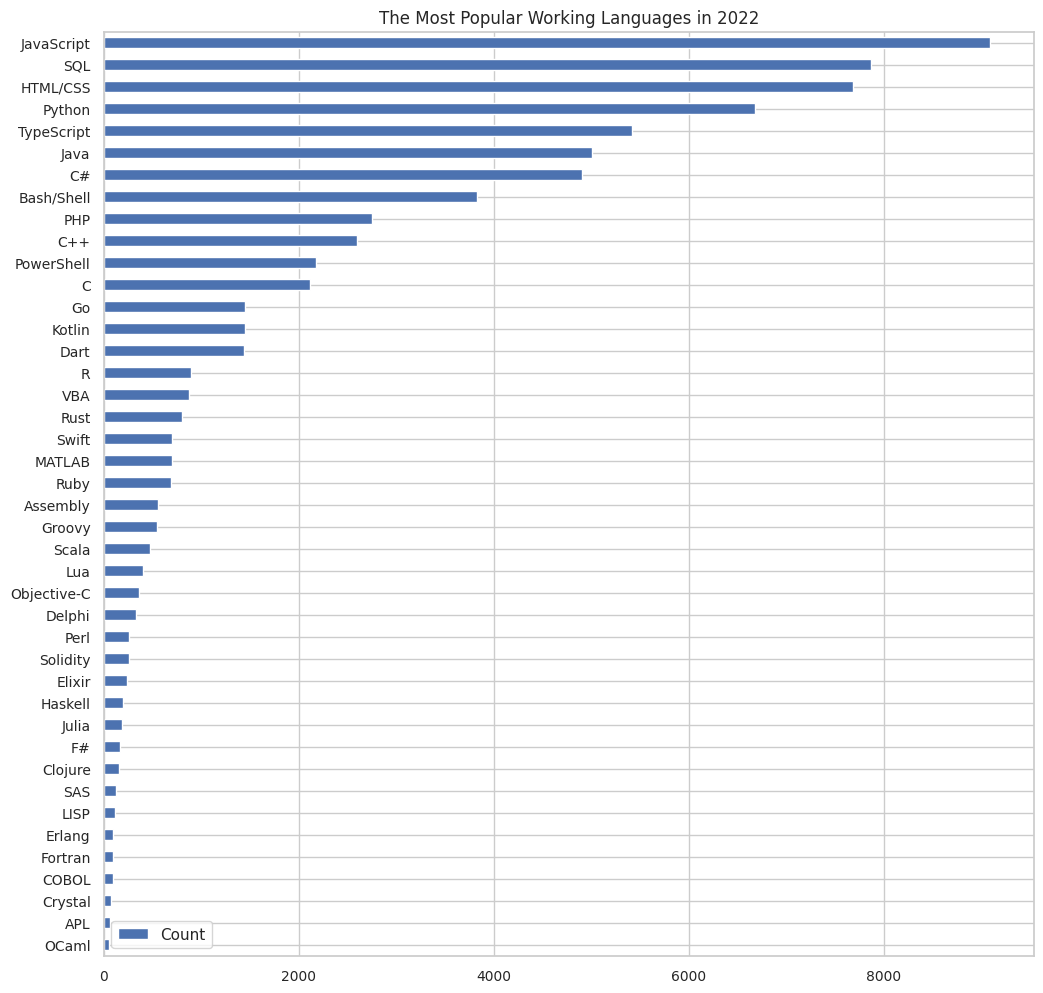

In [132]:
# let make a bar graph
plot_dimension_count(unique_worked_languages,'The Most Popular Working Languages in 2022')

When we splitted the prefered language programming, their distribution slightly changed. The top one is still javascript followed by python, but in the 3rd place comes SQL then C#.

# **2. What are the top jobs in 2022**

In [133]:
df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  1340
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                     917
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                  

In [134]:
unique_job = split_column(df['DevType'])

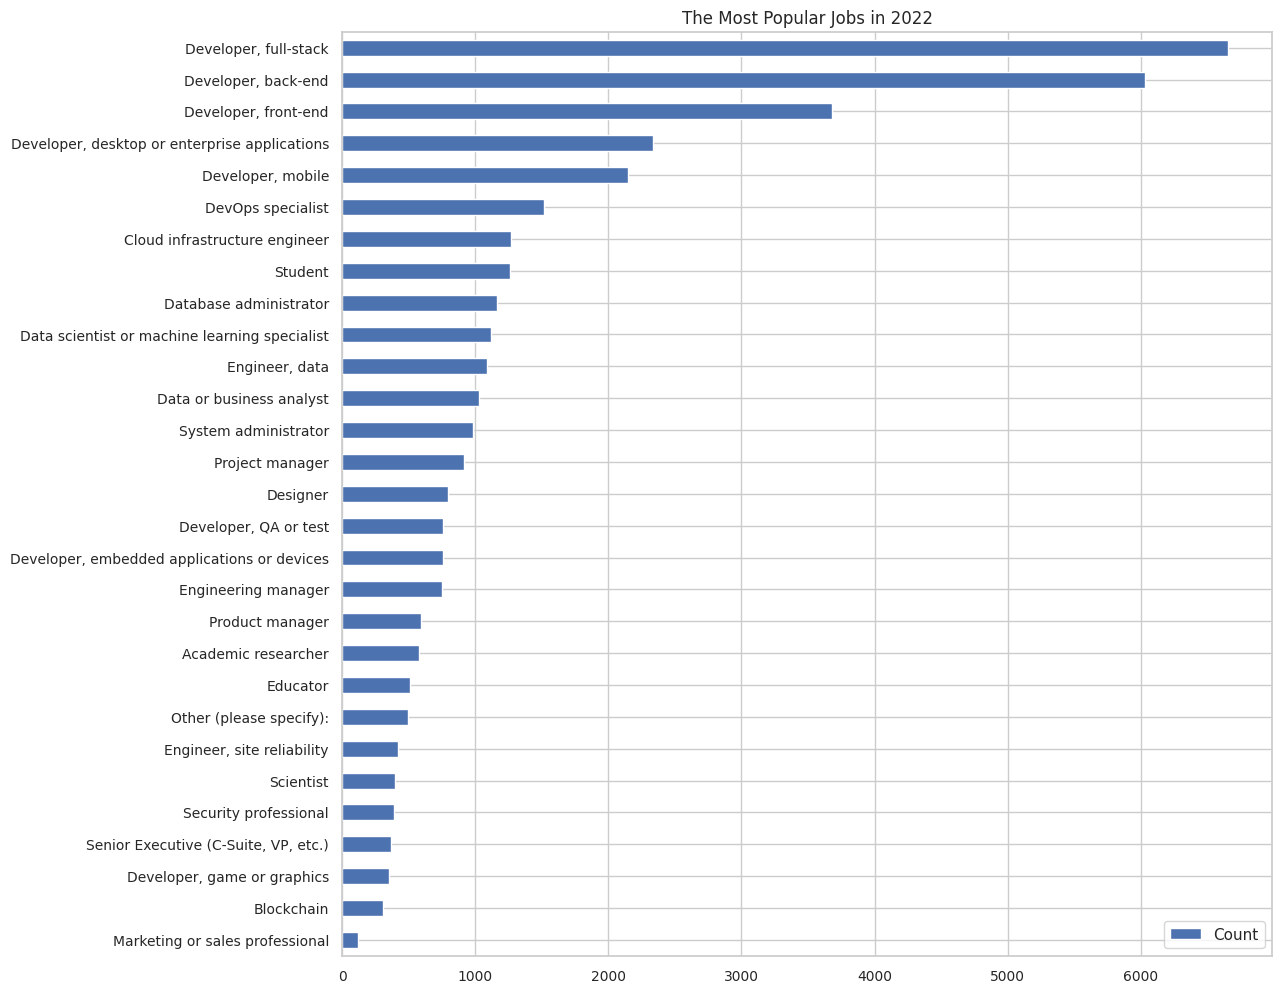

In [135]:
plot_dimension_count(unique_job,'The Most Popular Jobs in 2022')

### 3. RemoteWork ###

In [136]:
df['RemoteWork'].value_counts()/df['RemoteWork'].count()

Hybrid (some remote, some in-person)    0.445847
Fully remote                            0.419183
Full in-person                          0.134970
Name: RemoteWork, dtype: float64

In 2022, 45% of developers work in hybrid, 42% choose to work fully remotely, whereas only 13% work fully in person.


# **4. What are the top learning course certification in 2022?**

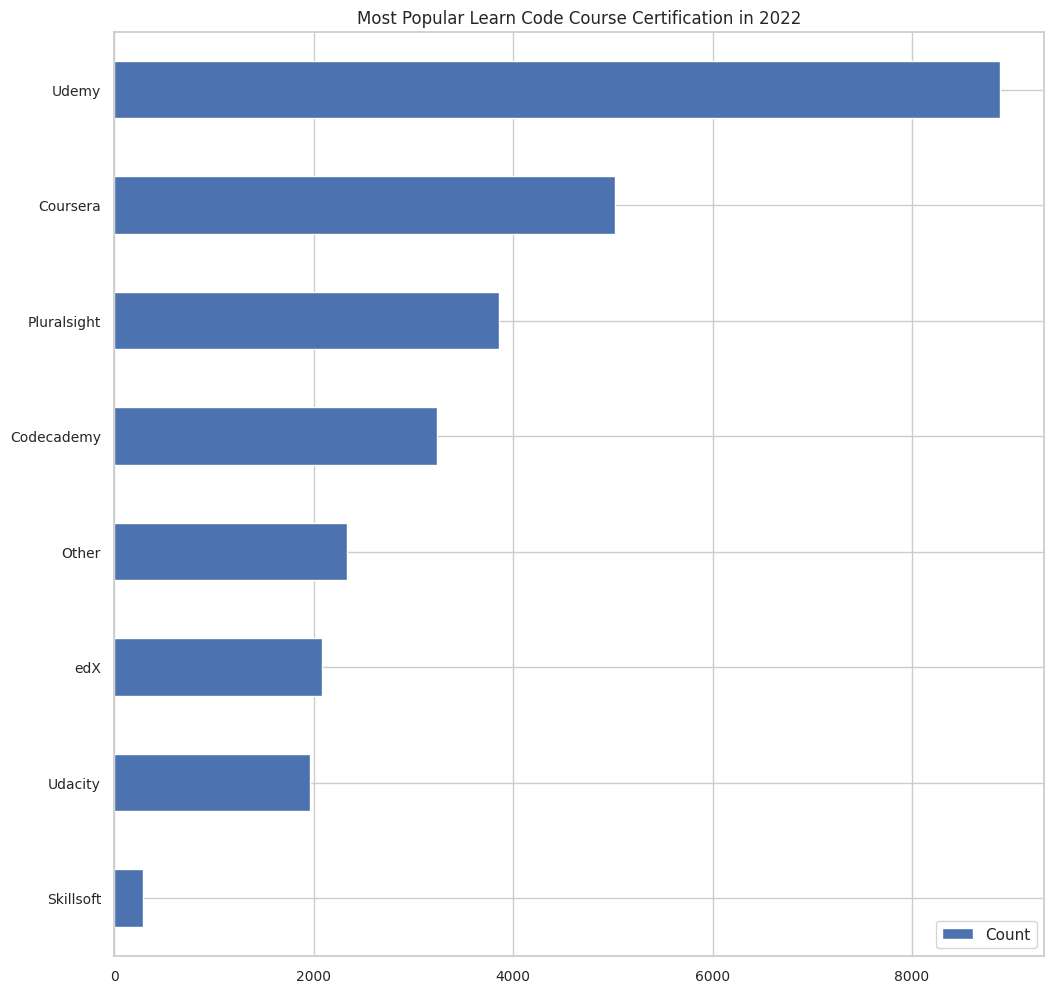

In [157]:
unique_courseCert = split_column(df['LearnCodeCoursesCert'])
plot_dimension_count(unique_courseCert,'Most Popular Learn Code Course Certification in 2022')

Udemy is ranked the top learning course in demand, Coursera comes in second place, followed by pluralsight and then codeacademy. I guess the cost of certification hightly influeces this ranking

**Conclusion**
During this Udacity project from StackOverflow data, we worked with data coming from a survey that collects 73,268 entries.

We explored the StackOverflow’s Dataset which records the review of developers about their job, education, career etc..

Our focus during this project was on answering the following questions:


1- What are the most working programming language in 2022?
2- what are the top jobs in 2022?
3- What is the proportion of developers who work remotely?
4- What are the most learning course certification in 2022?

We began this project by first exploring, cleaning the data, before proceeding to find answers to our primarily driven queries.

Q1: We have found that Javascript is the most demanding programming language.
Q2: We have found that the full stack developer is the top job of 2022.
Q3: 87% of developers work in hybrid or remotely.
Q4: we found out that most developers got udemy certification or coursera certification.


Overall, I found this project challenging, mainly due to the structure of the data that needs a further investigation to be better analysed.

Further Improvements and Experimentation
Due to time reasons, I couldn't get a chance to better clean the data. For example, all columns that contains multiple values should be divided into sub columns. This step will allow for example to answer which are the top programming language associated to each job? Does the online certification affect the choice of working remotely? 